
# Notes on Paper 

[Discovering Symbolic Models from Deep Learning with Inductive Biases](https://arxiv.org/abs/2006.11287)






# Abstract 

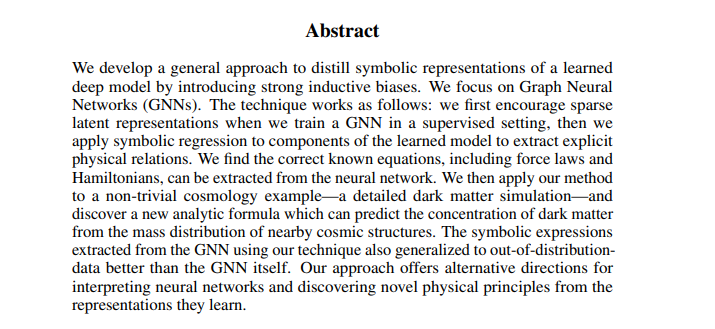



# 1. Overview 

> We develop a general approach to distill symbolic representations of a learned
deep model by introducing strong inductive biases. We focus on Graph Neural
Networks (GNNs).

This paper improves SOTA about Symbolic Regression to derive Math Equations from Numerical Dataset using 
- GNN to structure the Dataset using some inductive biases 
  - the **key contribution** is here 
- Evolutionary Algos to perform Symbolic Regression 
  - this is standard 



# 2. Problem Statement 



## 2.1 Evolutionary Algos and the Scalability Issue 

It uses a common approach for the actual symbolic regression which is **Evolutionary Algos** but the main limitations for them is they **do not scale well**, in fact at the end of Pag.1 it is said 

> However, typically one uses genetic algorithms—essentially a brute force
procedure as in [2]—which scale exponentially with the number of input variables and operators. Many machine learning problems are thus intractable for traditional symbolic regression.

So to sum up the main limitations of Evolutionary Algos is related to the fact they **scale exponentially** with respect to 
- dimensionality of the input space 
- dimensionality of the symbols space 

So the **main contribution** of this paper is to make the Evolutionary Algos approach for Symbolic Regression more scalable on some practical applications using the GNN as an intermediate representation of the Dataset to **reduce the dimensionality of the input space**, as the dimensionality of the symbols space and the symbols themselves are not learned, they are hyperparams 



# 3. Key Contributions 




## 3.1 Key Contribution 1 : Pairwise Interactions via GNN Representation 

The GNN inductive bias is related to the fact **it forces to model the problem decoupling the effects** : in fact, in the case of learning the equations of the Newtonian Dynamic for a N Bodies System (first example of application shown in the paper), the goal is to exploit the following **model - problem analogy** 
- Nodes = Particles 
- Edges = Forces 

As a result of this, **only pairwise interactions are modelled** out of the dataset as this is a standard graph (not an hypergraph) and **the edges model only pairwise relationships** 

In fact this is also said by the authors at the beginning of Pag.4 it says 

> A key advantage of fitting a symbolic model on internal GN functions is that the **symbolic regression never needs to consider more than two particles at once**. This makes the symbolic regression problem tractable.

Without this inductive bias, hence operating on the original Dataset, no pairwise interaction shaping would have been added 



## 3.2 Key Contribution 2 : Functions Decoupling 

The GNN is composed of 3 learnable functions 

- the $\phi^{e}(v_{i}, v_{j}; \theta_{e}) \rightarrow e_{i,j}$ Message Encoding Function 
  - for each directed edge going $v_{i} \rightarrow v_{j}$ this function creates a message $e_{i,j} \in \mathcal{M}$ in the Messages Latent Space passing the information 
  - in the Newtonian Dynamic Example, the idea is the GNN learns to represent into the messages the pairwise interactions between the particles hence something physically interpretable as forces 
    - **NOTEs** 
      - Forces are not present into the Dataset, in fact it contains only Nodes Properties, hence it is the GNN learning to compute forces from the given particle-specific features present in the Dataset and to represent them in messages 
      - The Particle-Specific Features present in the Dataset are position, velocities, mass 
    
- the $\phi^{v}(x_{i}, \Sigma_{j \in N(v_{i})} e_{i,j}; \theta_{v}) \rightarrow y_{i}$ Node Update Function 
  - for node $v_{i}$ it computes the property $y_{i}$ based on $x_{i}$ node specific input features and $\{e_{i,j}\}_{j \in N(v_{i})}$ the set of messages coming from $N(v_{i})$ the neighborhood of the node 
  - in geneal, it could also take into account the state of the node itself at the previous computation step 

- the $\phi^{u}$ Global Property Computation Function 
  - it takes the Global State of the Graph and computes some kind of propert, which can be represented as number, vector, label, ... related this one 

The **Symbolic Regression** is essentially a **Distillation Process** which can be performed on each NN separately 

We can represent it as $f_{SR}(\phi^{\cdot}) \rightarrow \tilde \phi^{\cdot}$ where $\phi^{\cdot} \in \{\phi^{e}, \phi^{v}, \phi^{u}\}$ and it can be extended in case the GNN makes use of more kinds of learnable functions 

Every time we have the NN distilled into the Symbolic Model it is possible to plug it into the GNN as follows $\phi^{\cdot} \rightarrow \tilde \phi^{\cdot}$ and re-run the computation 




## 3.3 Key Contribution 3 : Low Dim Latent Space 

In addition to the pairwise interactions inductive bias, another key contribution is related to the learning a low dimensional latent representation 

The authors say this is also another key contribution which makes the Symbolic Regression Tractable in Pag.4 regarding 

> Compact internal representations.

when they say 

> More practically, by reducing the size of the latent representations, we can filter out all low-variance latent features without compromising the accuracy of the model, and **vastly reducing the dimensionality of the hidden vectors**. This makes the **symbolic regression of the internal models more tractable**.










# 4. Example Applications 




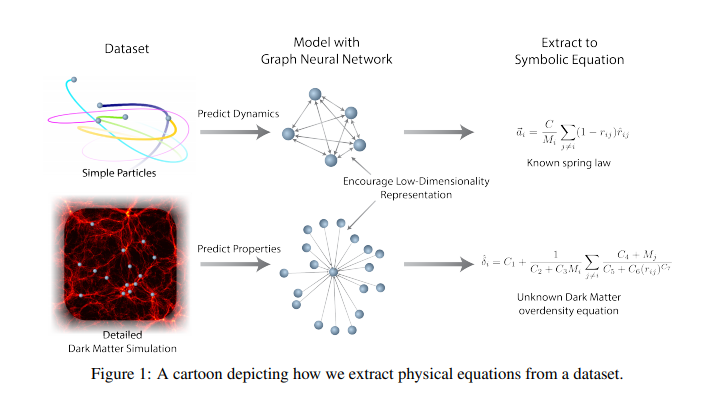






## 4.1 Newtonian Dynamic 



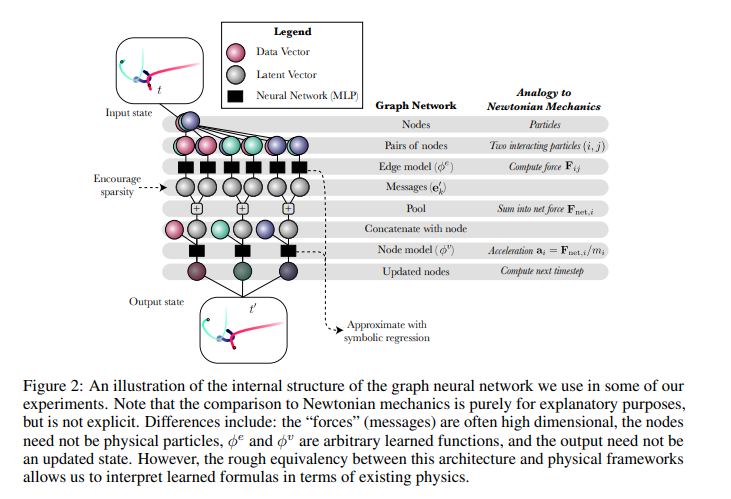



### Comments 

It is possible to see the NN represented as Black Boxes are the input of the Symbolic Regression Process so that $\tilde \phi^{\cdot} = f_{SR}(\phi^{\cdot})$ is performed 

On the right, the analogy with the Newtonian Dynamic Case is presented 






# 5. Key Aspects 



## 5.1 Latent Space Dimensionality Reduction and Interpretability : Learning Forces into Messages 



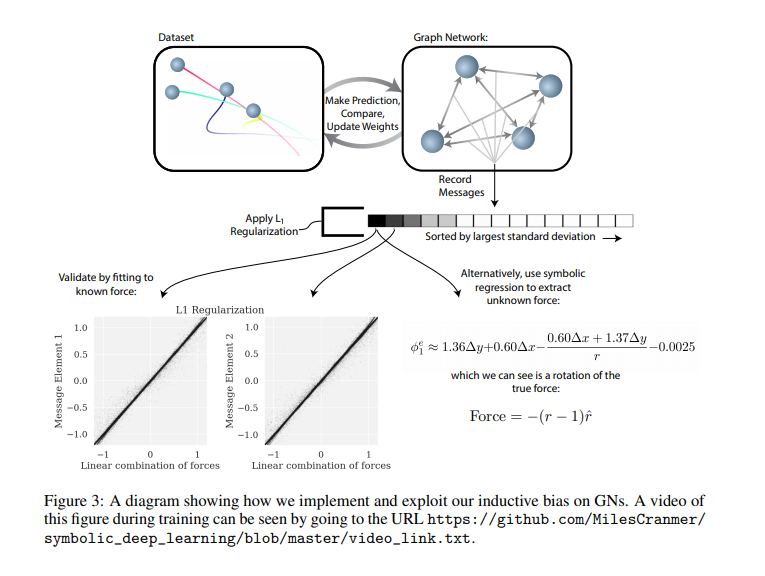



# 6. Important Elements 



## 6.1 General 


Let's consider the example of the **Newtonian Dynamic Learning in the case of N Bodies System in 2D Euclidean Space** 

- Goal 
  - The idea is to be able to compute $\{a_{i}\}_{i=1,...,N}$ the Accelerations for $N$ Particles interacting by means of forces 





## 6.2 Space 



- $\mathcal{I}$ 
  - Input Features Space 
  - It consists of all that's needed information: $\vec x_{i}$ position, $\vec v_{i}$ velocities, $m_{i}$ masses 


- $\mathcal{M}$ 
  - Messages Features Space 
  - Messages are Latent Embeddings of the Input Features 
  - The dimensionality can be set as an hyperparam as if we want the edge messages to model forces then we know, from the problem, this should be 2D as the geometry of the original problem space is 2D Euclidean 
  - However it has been observed this Bottleneck Representation imposed as an hyperparams makes the system learn less effectively than making it learning the dimensionality as well 
    - The Dimensionality Learning can be done imposing a Regularization Term on the Latent Representation Dimensionality to favor a **simpler and lower dimensionial representation** in a higher dimensional space like 
      - from a Numerical Perspective, the $L_{1}$ regularization which favors **sparsity** 
        - it means in some dimensions the weights will be close to zero hence equivalently their standard deviation will be very low 
      - from a Probabilistic Perspective, the $KL(M, \mathcal{N})$ KL divergence with respect to a simple Prior like a Gaussian PDF factorizing in the Latent Space  






## 6.3 Functions 




- $\phi^{e}$ 
  - The Encoder Function from the $\mathcal{I}$ Input Feature Space to $\mathcal{M}$ Latent Message Space, so $\phi^{e} : \mathcal{I} \rightarrow \mathcal{M}$
  - Implemented with a NN 

- $\phi^{v}$ 
  - The Node Update Function 
  - Implemented as NN 





## 6.4 Data



- Dataset 
  - For the Acceleration Prediction Problem in Supervised Learning 
    - $D = \{(x_{i}, y_{i})\}$ with 
      - $x_{i} = \{\vec x, \vec v, m\}$ particle-specific features which are $\vec x$ position, $\vec v$ velocity, $m$ mass, $q$ charge, ... depending on the forces that are modelled 
      - $y_{i} = a_{i}$ acceleration for a particle 



## 6.5 Processing 



- Dataset Learning 
  - It consists of training the GNN to perform numerical predictions as a generalization over the Dataset 
  - So basically considering $f_{GNN}(x; \theta) \rightarrow y$ GNN Model after having it trained over the Dataset $D$ with the Objective Function $L(y, \hat y)$ so that $\theta' = \arg\min_{\theta \in \Theta} L(f_{GNN}(x_{i}; \theta), \hat y_{i}) \quad \forall (x_{i}, y_{i}) \in D$ then we have $f_{GNN} : \mathcal{X} \rightarrow \mathcal{Y}$ which works quite well 


- Processing 
  - The Processing leading to the nodes update 
  - Step 1 : Input Data 
    - $x_{i} = {\vec x, \vec v, m}_{i} \quad x_{i} \in \mathcal{X}$ the input features of the node $v_{i}$ are passed and concatenated as a unique feature vector 
  - Step 2 : Messages Computation 
    - $e_{i,j} = \phi^{e}(v_{i}, v_{j}; \theta_{e}) \quad e_{i,j} \in M$ for each edge the corresponding latent message is computed as a result of the processing of the message encodeing function 
      - there is only one NN for every edge, so it is a form of weights sharing 
  - Step 3 : Nodes Update Computation 
    - $y_{i}(t+1) = \phi^{v}(x_{i}(t), \Sigma_{j \in N(v_{i})} e_{i,j}(t); \theta_{v}) \quad y_{i} \in Y$ for each node 
      - there is only one NN for every node, so it is a form of weights sharing 
      - the output results, in this case the acceleration for each particle, is computed from the learneble function $\phi^{v}$ represented as a NN with input 
        - the $e_{i,j}(t) \quad j \in N(v_{i})$ so the messages related to the previous time step belonging to the neighborhood of the considered node  
        - the input features or in more general terms also the previous state of the node



